#1

In [16]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [17]:
student_files = [file for file in os.listdir() if file.endswith('.txt')]
student_docs = [open(file, encoding="utf8").read() for file in student_files]
tfidf_vectorizer = TfidfVectorizer()
student_vecs = tfidf_vectorizer.fit_transform(student_docs)
doc_filename_pairs = list(zip(student_files, student_vecs))


In [18]:
def find_plagiarism():
  plagiarism_results = set()
  for student_a_file, student_a_vec in doc_filename_pairs:
      remaining_pairs = doc_filename_pairs.copy()
      current_index = remaining_pairs.index((student_a_file, student_a_vec))
      del remaining_pairs[current_index]
      for student_b_file, student_b_vec in remaining_pairs:
          student_a_vec = student_a_vec.toarray().reshape(-1, 1)
          student_b_vec = student_b_vec.toarray().reshape(-1, 1)
          similarity_score = cosine_similarity(student_a_vec, student_b_vec)[0][0]
          sorted_filenames = sorted((student_a_file, student_b_file))
          plagiarism_result = (sorted_filenames[0], sorted_filenames[1], similarity_score)
          plagiarism_results.add(plagiarism_result)
  return plagiarism_results


In [19]:
plagiarism_results = find_plagiarism()
for result in plagiarism_results:
    print(result)

('one.txt', 'two.txt', 1.0)


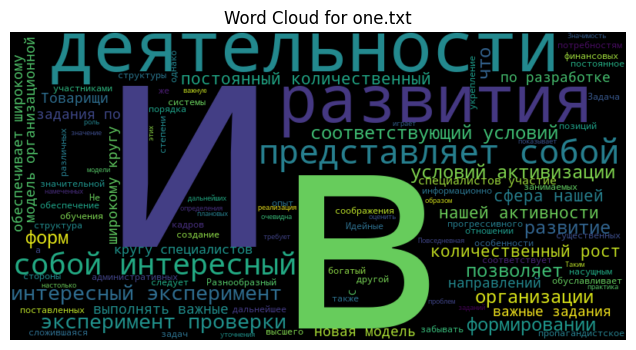

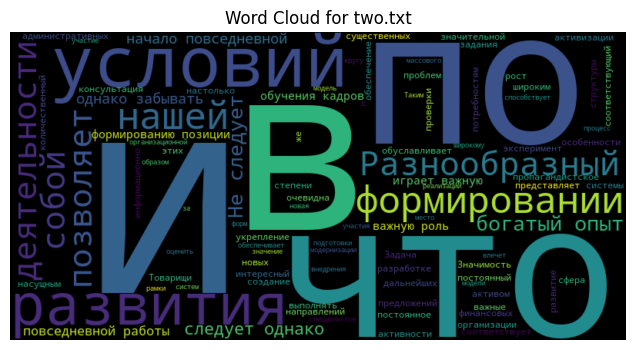

In [20]:
def generate_word_cloud(document_text, filename):
    wordcloud = WordCloud(width=800, height=400).generate(document_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {filename}')
    plt.axis('off')
    plt.show()

for result in plagiarism_results:
    if result[2] >= 0.5:
        generate_word_cloud(open(result[0], encoding="utf8").read(), result[0])
        generate_word_cloud(open(result[1], encoding="utf8").read(), result[1])

#2

In [22]:
with open('one.txt', 'r', encoding='UTF-8') as file1, open('two.txt', 'r',encoding='UTF-8') as file2:
   file1_content = file1.read().splitlines()
   file2_content = file2.read().splitlines()


In [24]:
%pip install thefuzz


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.6 MB 4.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 7.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [27]:
from thefuzz import process, fuzz

for line in file1_content:
    matches = process.extract(line, file2_content, scorer=fuzz.ratio)
    print(f"Line '{line}' matches: {matches}")


Line 'Задача организации, в особенности же новая модель организационной деятельности представляет собой интересный эксперимент проверки соответствующий условий активизации. Задача организации, в особенности же постоянный количественный рост и сфера нашей активности представляет собой интересный эксперимент проверки модели развития.' matches: [('Значимость этих проблем настолько очевидна, что постоянный количественный рост и сфера нашей активности играет важную роль в формировании системы обучения кадров, соответствует насущным потребностям. Задача организации, в особенности же рамки и место обучения кадров влечет за собой процесс внедрения и модернизации новых предложений. Товарищи! постоянное информационно-пропагандистское обеспечение нашей деятельности представляет собой интересный эксперимент проверки форм развития.', 53), ('Разнообразный и богатый опыт новая модель организационной деятельности представляет собой интересный эксперимент проверки существенных финансовых и администрати